## Preprocessing

In [3]:
 #Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN'],inplace=True)
application_df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [5]:
# Determine the number of unique values in each column.
for i in application_df.columns:
    print(i,len(application_df[i].unique()))

NAME 19568
APPLICATION_TYPE 17
AFFILIATION 6
CLASSIFICATION 71
USE_CASE 5
ORGANIZATION 4
STATUS 2
INCOME_AMT 9
SPECIAL_CONSIDERATIONS 2
ASK_AMT 8747
IS_SUCCESSFUL 2


In [6]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
app_counts= application_df['APPLICATION_TYPE'].value_counts()
app_counts

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [8]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace= list(app_counts[app_counts<500].index)
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts= application_df['CLASSIFICATION'].value_counts

In [58]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df['CLASSIFICATION'].value_counts().loc[lambda x:x>1]

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classification_counts= application_df['CLASSIFICATION'].value_counts()
classifications_to_replace= list(classification_counts[classification_counts<1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummies= pd.get_dummies(application_df)
application_dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC,NAME_100 BLACK MEN OF AMERICA,NAME_100 BLACK MEN OF MEMPHIS INC,NAME_100 BLACK MEN OF WEST GEORGIA INC,NAME_1150 WEBSTER STREET INC,NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION,NAME_13TH BOMB SQUADRON ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [12]:
# Split our preprocessed data into our features and target arrays
X=application_dummies.drop('IS_SUCCESSFUL',axis=1).values
y=application_dummies['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
X_train_scaled.shape

(25724, 19611)

## Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features= X_train_scaled.shape[1]
hidden_node1=80
hidden_node2=30
hidden_node3=30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_node1,activation='relu',input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_node2,activation='relu'))

nn.add(tf.keras.layers.Dense(units=hidden_node3,activation='relu'))
# Output layer
nn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))


# Check the structure of the model
nn.summary()

c:\Users\rekha\.anaconda\anocanda3\envs\dev3.10\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │     1,568,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,572,351 (6.00 MB)

 Trainable params: 1,572,351 (6.00 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Compile the model
nn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
# Train the model
fit_model=nn.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7338 - loss: 0.5305
Epoch 2/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9395 - loss: 0.1476
Epoch 3/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9607 - loss: 0.0965
Epoch 4/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9634 - loss: 0.0860
Epoch 5/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9647 - loss: 0.0861
Epoch 6/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9599 - loss: 0.0944
Epoch 7/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9636 - loss: 0.0863
Epoch 8/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9638 - loss: 0.0903
Epoch 9/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9653 - loss: 0.0869
Epoch 10/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9658 - loss: 0.0837
Epoch 11/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9637 - loss: 0.0847
Epoch 12/50
804/804 ━━━━━━━━━━━━━━━━━━━━

In [80]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 2s - 6ms/step - accuracy: 0.7263 - loss: 0.7120
Loss: 0.7120177745819092, Accuracy: 0.7262973785400391


<Axes: >

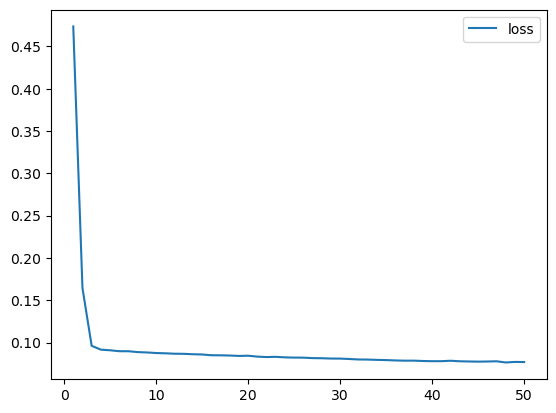

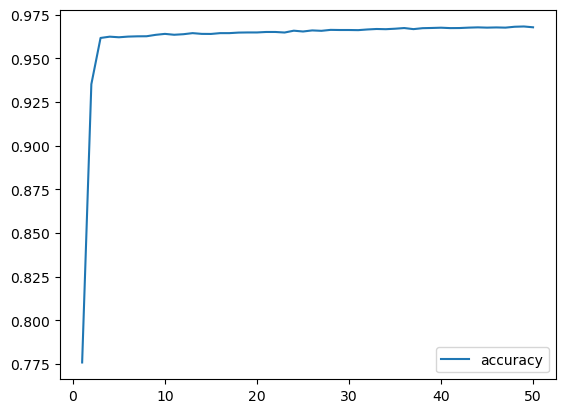

In [81]:
# Export our model to HDF5 file


history_df=pd.DataFrame(fit_model.history)

history_df.index +=1
history_df.plot(y='loss')
history_df.plot(y='accuracy')


In [ ]:
nn.save('../h5_files/AlphabetSoupCharity_model_.h5')

In [82]:
input_features=X_train_scaled.shape[1]
hidden_node1=90
hidden_node2=30
hidden_node3=20
nn_model_2=tf.keras.models.Sequential()
nn_model_2.add(tf.keras.layers.Dense(units=hidden_node1,activation='tanh',input_dim=input_features))
nn_model_2.add(tf.keras.layers.Dense(units=hidden_node2,activation='tanh'))
nn_model_2.add(tf.keras.layers.Dense(units=hidden_node3,activation='tanh'))
nn_model_2.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))  
nn_model_2.summary()           

c:\Users\rekha\.anaconda\anocanda3\envs\dev3.10\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 90)             │     1,765,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 30)             │         2,730 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,768,451 (6.75 MB)

 Trainable params: 1,768,451 (6.75 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
nn_model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [85]:
fit_model_2=nn_model_2.fit(X_train_scaled,y_train,epochs=20)

Epoch 1/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.7230 - loss: 0.5250
Epoch 2/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.9424 - loss: 0.1584
Epoch 3/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.9640 - loss: 0.0936
Epoch 4/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9623 - loss: 0.0928
Epoch 5/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9633 - loss: 0.0886
Epoch 6/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9623 - loss: 0.0914
Epoch 7/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9634 - loss: 0.0865
Epoch 8/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9640 - loss: 0.0878
Epoch 9/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9654 - loss: 0.0825
Epoch 10/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9659 - loss: 0.0851
Epoch 11/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9631 - loss: 0.0858
Epoch 12/20
804/804 ━━━━━━━━━━

In [86]:
model_loss,model_accuracy=nn_model_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f'Loss:{model_loss},Accuracy:{model_accuracy}')


268/268 - 1s - 5ms/step - accuracy: 0.7801 - loss: 0.5023
Loss:0.5022569894790649,Accuracy:0.7800583243370056


<Axes: >

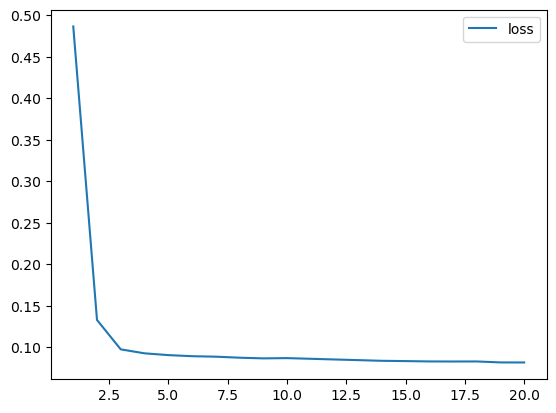

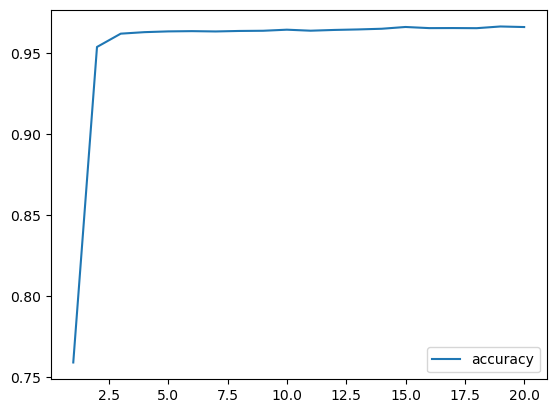

In [87]:
history_df=pd.DataFrame(fit_model_2.history)
history_df.index +=1
history_df.plot(y='loss')
history_df.plot(y='accuracy')

In [ ]:
nn_model_2.save('../5_files/AlphabetsSoupCharity_model_2.h5')